In [1]:
import os
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
data_path = "/home/srivasta/shared/us_presidential_election_2020/SimpleExtractionFeatures/vp_debate_version2"
os.chdir(data_path)

In [4]:
#specify datatypes so that datatype guessing isnt done (looks like he has mentioned default returned value as 'none' string everywhere)
dtype={'hashtag_content': object}
df = pd.read_csv('SED/hashtag_content.csv',dtype=dtype,lineterminator='\n')

In [5]:
df.head()

,hashtag_content
0,"('empty', 0, [])"
1,"('empty', 0, [])"
2,"('empty', 0, [])"
3,"('empty', 0, [])"
4,"('empty', 0, [])"


In [12]:
hashtag_dict = {}

def get_hashtags(df):
    for index, row in df.iterrows():
        tup = eval(row['hashtag_content'])
        hashtags = tup[2] 
        for hasht in hashtags:
            if hasht.lower() in hashtag_dict:
                hashtag_dict[hasht.lower()]+=1
            else:
                hashtag_dict[hasht.lower()]=1
    print(hashtag_dict)
    

In [13]:
get_hashtags(df)

{'trump': 154608, 'branchcovidians': 101, 'trumpvirus': 2793, 'trump2020': 146013, 'new': 4342, 'russiagate': 3518, 'magadays': 190, 'maga2020': 4936, 'coronavirus': 9156, 'memewars': 2, 'kag': 12100, 'lawandorder': 1220, 'stockmarket': 729, 'stimulus': 1693, 'democrats': 8732, '2a': 1404, 'facebook': 546, 'twitter': 753, 'google': 337, 'socialmedia': 343, 'censorship': 413, 'boricuasfortrump': 33, 'maga': 28315, 'leadright': 568, 'joebiden': 11853, 'republicanvoters': 3, 'trump4moreyears': 6, 'fearofplexiglas': 1, 'twitterpoll': 387, 'election2020': 38085, 'xrp': 56, 'vet': 3, 'ripple': 27, 'greatreset': 9, 'pandemic': 2144, 'joelkatz': 1, 'soproud': 2, 'debates2020': 108896, 'dxy': 15, 'usdx': 8, 'pelosi': 4056, 'democrat': 1717, 'trumpislosing': 130, 'biden2020': 8117, 'presidenttrump': 3930, 'whitehouse': 2185, 'walterreedhospital': 127, 'covidiots': 311, 'biden': 53680, 'rachelmaddow': 23, 'mutebutton': 10, 'tuckercarlson': 133, 'hannity': 1500, 'declassifying': 6, 'draintheswamp'

In [16]:
from operator import itemgetter
def print_top_n_values(N):
    res = dict(sorted(hashtag_dict.items(), key = itemgetter(1), reverse = True)[:N])
    return res


In [18]:
print("Top 30 values: ", print_top_n_values(30))

Top 30 values:  {'vpdebate': 192517, 'trump': 154608, 'trump2020': 146013, 'debates2020': 108896, 'bidenharris2020': 78623, 'kamalaharris': 60777, 'biden': 53680, 'endsars': 47367, 'election2020': 38085, 'flygate': 34526, 'covid19': 31800, 'vote': 28568, 'maga': 28315, 'imspeaking': 25375, 'vpdebate2020': 25041, 'blacklivesmatter': 20792, 'donaldtrump': 16292, 'kamalawonthedebate': 15714, 'florida': 15349, 'mikepence': 14171, 'potus': 13234, 'vicepresidentialdebate2020': 12719, 'kag': 12100, 'restartleader': 11902, 'joebiden': 11853, 'pence': 11851, 'debate': 11336, 'penceknew': 9637, 'pencelied': 9631, 'trumplied200kamericansdied': 9563}


In [20]:
from wordcloud import WordCloud

In [25]:
top100 = print_top_n_values(100)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(top100)

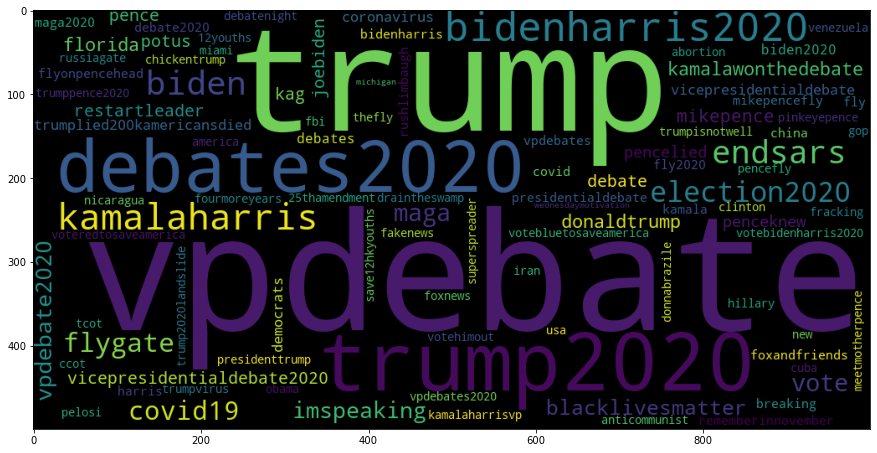

In [26]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [29]:
print("Top 100 values: ", print_top_n_values(100))

Top 100 values:  {'vpdebate': 192517, 'trump': 154608, 'trump2020': 146013, 'debates2020': 108896, 'bidenharris2020': 78623, 'kamalaharris': 60777, 'biden': 53680, 'endsars': 47367, 'election2020': 38085, 'flygate': 34526, 'covid19': 31800, 'vote': 28568, 'maga': 28315, 'imspeaking': 25375, 'vpdebate2020': 25041, 'blacklivesmatter': 20792, 'donaldtrump': 16292, 'kamalawonthedebate': 15714, 'florida': 15349, 'mikepence': 14171, 'potus': 13234, 'vicepresidentialdebate2020': 12719, 'kag': 12100, 'restartleader': 11902, 'joebiden': 11853, 'pence': 11851, 'debate': 11336, 'penceknew': 9637, 'pencelied': 9631, 'trumplied200kamericansdied': 9563, 'vicepresidentialdebate': 9319, 'coronavirus': 9156, 'democrats': 8732, 'biden2020': 8117, 'debates': 8048, 'debate2020': 7284, 'breaking': 7230, 'foxandfriends': 6847, 'vpdebates': 6827, 'fly2020': 6641, 'rememberinnovember': 6378, 'rushlimbaugh': 6285, 'mikepencefly': 6185, 'flyonpencehead': 6055, 'bidenharris': 6002, 'fly': 5947, 'kamala': 5757, '

In [30]:
democrat_tags = ['bidenharris2020','kamalaharris','biden','flygate','imspeaking','blacklivesmatter','kamalawonthedebate','restartleader'
               'joebiden','pencelied','penceknew','trumplied200kamericansdied','democrats','biden2020','fly2020','mikepencefly', 'flyonpencehead',
               'bidenharris','kamala','harris','obama','meetmotherpence','kamalaharrisvp','pelosi','pencefly','russiagate','pinkeyepence','votehimout',
                'voteredtosaveamerica','votebidenharris2020','trumpvirus','hillary','chickentrump','votebluetosaveamerica','clinton']

In [31]:
republican_tags = ['trump','trump2020','maga','donaldtrump','mikepence','florida','potus','pence','foxandfriends','maga2020',
                  'trumppence2020','presidenttrump','gop','trumpisnotwell','anticommunist','fourmoreyears','foxnews','trump2020landslide']

In [32]:
independent_tags = ['rememberinnovember','rushlimbaugh','fly','america','abortion','venezuela','iran',
                   'ccot','draintheswamp','save12hkyouths','12youths','tcot','fracking','miami','usa',
                    'cuba','nicaragua','thefly','fbi','donnabrazile', '25thamendment''wednesdaymotivation','michigan']

In [33]:
covid_tags = ['endsars','covid19','coronavirus','covid','china','superspreader','fakenews']

In [34]:
def write_list_file(listname,filename):
    with open(filename, 'w') as f:
        for item in listname:
            f.write("%s\n" % item)
    print("written into file ",filename)

In [35]:
write_list_file(democrat_tags,'SED/democrat_tags.txt')

written into file  SED/democrat_tags.txt


In [ ]:
write_list_file(republican_tags,'SED/republican_tags.txt')
write_list_file(independent_tags,'SED/independent_tags.txt')
write_list_file(covid_tags,'SED/covid_tags.txt')

In [42]:
def get_count_hashtags(row):
    tup = eval(row)
    if tup[0]=="empty":
        return 0
    else:
        return tup[1]

In [44]:
df['count_hashtags']= df.apply(lambda x : get_count_hashtags(x['hashtag_content']),axis=1)

In [45]:
df['count_hashtags'].value_counts()

0     6302242
1      826001
2      273894
3      127887
4       53902
5       30558
6       12288
7        6565
9        3105
8        3098
10        899
11        491
12        216
13        215
14         70
15         13
16          7
17          4
18          2
Name: count_hashtags, dtype: int64